<a href="https://colab.research.google.com/github/Kshitijaa12/Phishing-website-detection-using-GRU-and-stacked-GRU/blob/main/stacked_gru_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Load data
data = pd.read_csv('/content/urldata.csv')

# Split data into X and y
X = data.drop(columns=['Label', 'Domain'])
y = data['Label']

# Preprocess data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define model architecture
model = Sequential()
model.add(GRU(64, input_shape=(X_train.shape[1], 1), activation='tanh', recurrent_dropout=0.2, return_sequences=True))
model.add(GRU(32, activation='tanh', recurrent_dropout=0.2, return_sequences=True))
model.add(GRU(16, activation='tanh', recurrent_dropout=0.2, return_sequences=True))
model.add(GRU(8, activation='tanh', recurrent_dropout=0.2))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile model

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy',
             tf.metrics.Precision(),
             tf.metrics.Recall(), ],

)
# model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy', tf.metrics.Precision(), tf.metrics.Recall(), ])

# # checkpoint_path = "/content/urldata.csv/checkpoint/"
# # checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,save_best_only=True,monitor='val_accuracy')
# # Train model
# history = model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=100, batch_size=32, callbacks=[cp_callback], validation_data=(X_valid.reshape((X_valid.shape[0], X_valid.shape[1], 1)), y_valid))

# # Evaluate model on test set
# test_loss, test_acc = model.evaluate(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test)
# print('Test accuracy:', test_acc)

In [ ]:
# early_stopping = keras.callbacks.EarlyStopping(
#     patience=20,
#     min_delta=0.01,
#     restore_best_weights=True,
# )
x_train = np.array([np.array(val) for val in X_train])
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=500,
    #callbacks=[early_stopping],
)

Epoch 1/500
3/3 [==============================] - 13s 786ms/step - loss: 0.6826 - binary_accuracy: 0.6280 - precision_2: 0.6484 - recall_2: 0.5675 - val_loss: 0.6754 - val_binary_accuracy: 0.6952 - val_precision_2: 0.7304 - val_recall_2: 0.5915
Epoch 2/500
3/3 [==============================] - 0s 166ms/step - loss: 0.6708 - binary_accuracy: 0.6555 - precision_2: 0.6818 - recall_2: 0.5897 - val_loss: 0.6673 - val_binary_accuracy: 0.6644 - val_precision_2: 0.6594 - val_recall_2: 0.6408
Epoch 3/500
3/3 [==============================] - 0s 156ms/step - loss: 0.6652 - binary_accuracy: 0.6203 - precision_2: 0.6140 - recall_2: 0.6581 - val_loss: 0.6615 - val_binary_accuracy: 0.5000 - val_precision_2: 0.4897 - val_recall_2: 0.6690
Epoch 4/500
3/3 [==============================] - 0s 164ms/step - loss: 0.6537 - binary_accuracy: 0.5662 - precision_2: 0.5551 - recall_2: 0.6889 - val_loss: 0.6552 - val_binary_accuracy: 0.5308 - val_precision_2: 0.5123 - val_recall_2: 0.7324
Epoch 5/500
3/3 [==

Best Validation Loss: 0.16866950690746307
Best Validation Accuracy: 0.9417808055877686
Best Recall: 0.922535240650177
Best Precision: 1.0


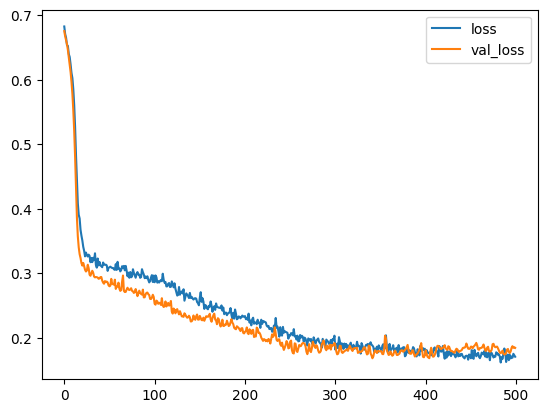

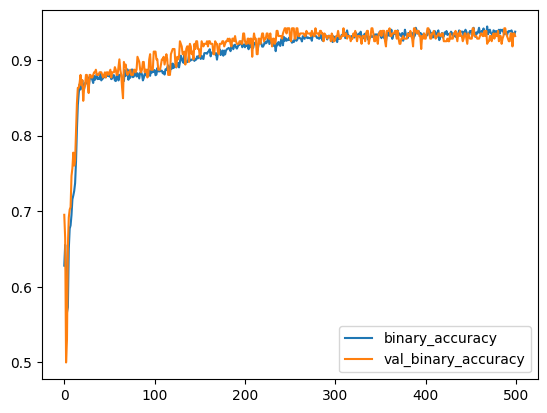

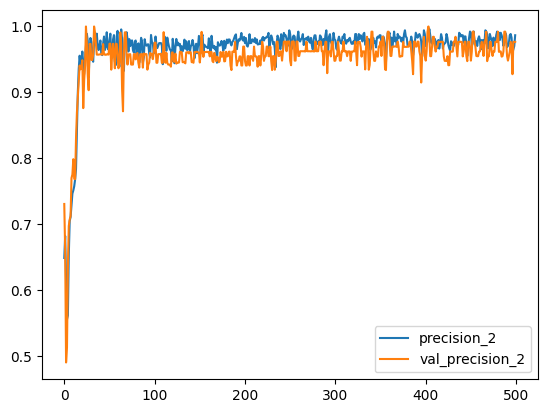

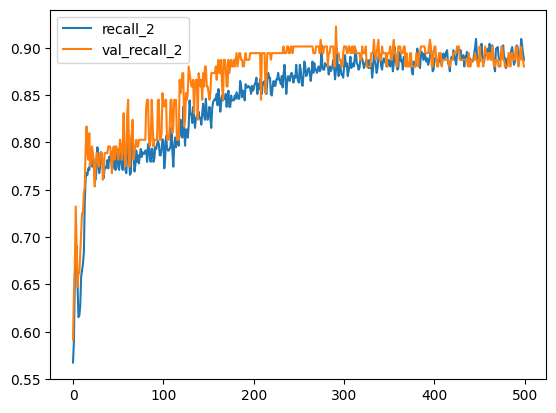

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['binary_accuracy', 'val_binary_accuracy']].plot()
history_df.loc[0:, ['precision_2', 'val_precision_2']].plot()
history_df.loc[0:, ['recall_2', 'val_recall_2']].plot()

print(f"Best Validation Loss: {history_df['val_loss'].min()}" +\
      f"\nBest Validation Accuracy: {history_df['val_binary_accuracy'].max()}" +\
      f"\nBest Recall: {history_df['val_recall_2'].max()}" +\
      f"\nBest Precision: {history_df['val_precision_2'].max()}")

In [ ]:
from sklearn.metrics import confusion_matrix

predicted = model.predict(X_valid)

print(confusion_matrix(y_valid,predicted.round()))

10/10 [==============================] - 1s 10ms/step
[[147   3]
 [ 17 125]]


Visualising Confusion Matrix

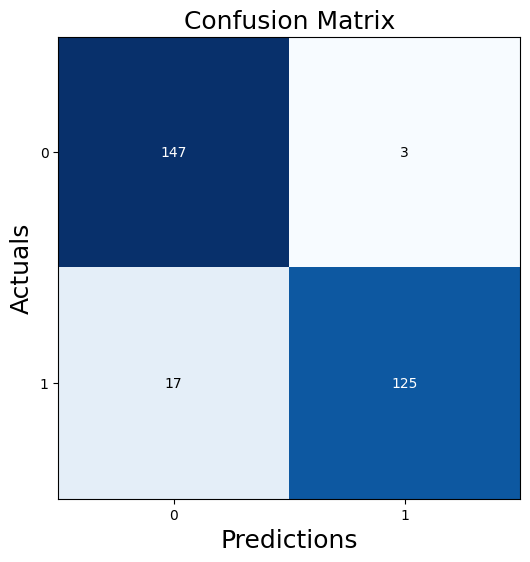

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat= confusion_matrix(y_valid,predicted.round()), figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
tp=147
fp=3
fn=17
tn=125
acc=(tp+tn)/(tp+tn+fp+fn)
prec=tp/(tp+fp)
rec=tp/(tp+fn)
f1= 2*(prec*rec/(prec+rec))
print(f"ACCURACY= {acc*100}")
print(f"PRECISION= {prec*100}")
print(f"RECALL= {rec*100}")
print(f"f1 score= {f1*100}")

ACCURACY= 93.15068493150685
PRECISION= 98.0
RECALL= 89.63414634146342
f1 score= 93.63057324840763


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, predicted.round()))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       150
           1       0.98      0.88      0.93       142

    accuracy                           0.93       292
   macro avg       0.94      0.93      0.93       292
weighted avg       0.94      0.93      0.93       292



In [ ]:
from sklearn import metrics
print(f"Accuracy of the model is : {metrics.accuracy_score(y_valid, predicted.round())}")
print(f"Precision of the model is : {metrics.precision_score(y_valid, predicted.round())}")
print(f"Recall of the model is : {metrics.recall_score(y_valid, predicted.round())}")
print(f"F1 Score of the model is : {metrics.f1_score(y_valid, predicted.round())}")

Accuracy of the model is : 0.9315068493150684
Precision of the model is : 0.9765625
Recall of the model is : 0.8802816901408451
F1 Score of the model is : 0.925925925925926
